In [1]:
#importing necessary libraries
import pandas as pd

In [2]:
#Loading the dataset
df=pd.read_excel("Churn.xlsx")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

From the dataset we can see,
Target variable: Churn

Predictor variables include the following information:

Demographic customer information: gender , SeniorCitizen , Partner , Dependents

Services: PhoneService , MultipleLines , InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport , StreamingTV , StreamingMovies

Customer account information:tenure , Contract , PaperlessBilling , PaymentMethod , MonthlyCharges , TotalCharges

In [6]:
#Checking for missing values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see from above that, there are 11 missing values in the 'TotalCharges' column in the dataset.Since we have a quite large dataset set consisting of 7043 rows,we drop these 11 rows having missing values

In [7]:
#Droping the rows containing missing values
df.dropna(axis=0,inplace=True)
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Hence now we have no missing values in our dataset

In [8]:
#Checking data type of each column
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
#drop 'customerID'
df.drop("customerID",axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Analyzing the data set

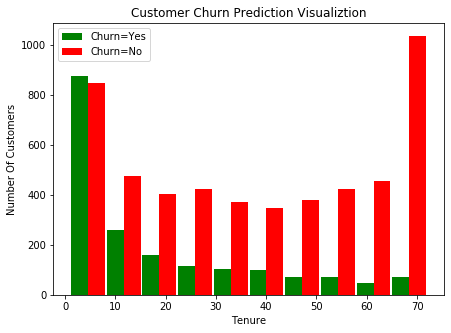

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline
churn_no = df[df.Churn=='No'].tenure
churn_yes = df[df.Churn=='Yes'].tenure
plt.figure(figsize=(7,5))
plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([churn_yes, churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()


The graph suggests the customers with shorter tenure are more likely to churn

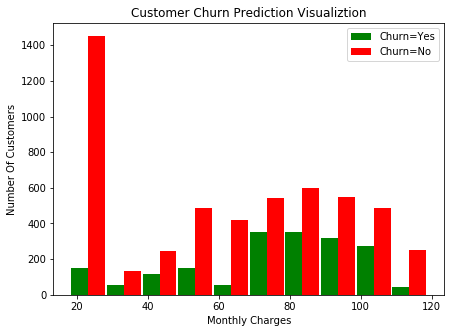

In [11]:
churn_no = df[df.Churn=='No'].MonthlyCharges
churn_yes = df[df.Churn=='Yes'].MonthlyCharges
plt.figure(figsize=(7,5))
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([churn_yes, churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()

###  Data PreProcessing and Building Predictive Model

In [12]:
#Handling categorical values

#checking unique values in each column having textual data
def col_unique_val(df):
    for col in df.columns:
        if df[col].dtypes=="object":
            print(f"{col}:{df[col].unique()}")
col_unique_val(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [13]:
df=df.replace(["No internet service","No phone service"],"No")
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [14]:
#Replace yes no values with 0 and 1: (Yes:1,No:0)
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
     df[col].replace({"Yes":1,"No":0},inplace=True)
        
#Replacing Female as 1 and Male as 0
df['gender'].replace({"Female":1,"Male":0},inplace=True)
col_unique_val(df)

InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [15]:
#Using dummy encoding for the remaining columns having categorical values
df1=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [16]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [17]:
#Scaling data
cols_scale=["tenure","TotalCharges","MonthlyCharges"]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1[cols_scale]=scaler.fit_transform(df[cols_scale])
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


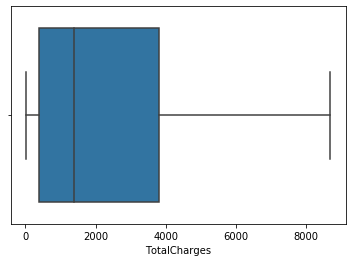

In [18]:
#Checking for outliers in TotalCharges and monthly charges using boxplot
import seaborn as sns
sns.boxplot(df.TotalCharges)

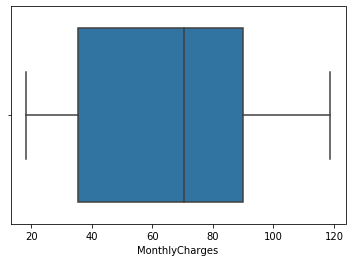

In [19]:
sns.boxplot(df.MonthlyCharges)

Hence the box plot suggests there are no outliers

In [20]:
df1.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [21]:
churn_rate=1869/(5163+1869)*100
churn_rate

26.578498293515356

Therefore it is evident that the dataset is imbalanced as the no. of churns is substantially smaller than the no. of non churns and the churn rate is 26.58%

In [22]:
count_class_0, count_class_1 = df1.Churn.value_counts()
df_class_0 = df1[df1['Churn'] == 0]
df_class_1 = df1[df1['Churn'] == 1]

In [23]:
#Handlling imbalance using oversampling technique
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_final = pd.concat([df_class_0, df_class_1_over], axis=0)

df_final.Churn.value_counts()


1    5163
0    5163
Name: Churn, dtype: int64

In [24]:
#Defining predictor and target values
X=df_final.drop('Churn',axis=1)
Y=df_final.Churn

In [25]:
#Splitting into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10,stratify=Y)

In [26]:
y_train.value_counts()

1    3614
0    3614
Name: Churn, dtype: int64

In [27]:
y_test.value_counts()

1    1549
0    1549
Name: Churn, dtype: int64

### Fit data to different models and Compare Accuracy

In [28]:
accuracy_models={}

In [29]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
logreg = LogisticRegression(random_state = 0)
logreg.fit(x_train, y_train)
y_pred_lr=logreg.predict(x_test)

In [30]:
accuracy_models['Logistic Regresion']=accuracy_score(y_test,y_pred_lr)

In [31]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1549
           1       0.74      0.81      0.77      1549

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.76      3098
weighted avg       0.77      0.77      0.76      3098



In [32]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn=knn.predict(x_test)

In [33]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.68      0.74      1549
           1       0.73      0.86      0.79      1549

    accuracy                           0.77      3098
   macro avg       0.78      0.77      0.77      3098
weighted avg       0.78      0.77      0.77      3098



In [34]:
accuracy_models['KNN']=accuracy_score(y_test,y_pred_knn)

In [35]:
#Decision Tree Algorithn
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred_tree=tree.predict(x_test)

In [36]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1549
           1       0.81      0.92      0.86      1549

    accuracy                           0.85      3098
   macro avg       0.86      0.85      0.85      3098
weighted avg       0.86      0.85      0.85      3098



In [37]:
accuracy_models['Decision Tree']=accuracy_score(y_test,y_pred_tree)

In [38]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier()
rand.fit(x_train, y_train)
y_pred_rand=rand.predict(x_test)

In [39]:
print(classification_report(y_test,y_pred_rand))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1549
           1       0.85      0.93      0.89      1549

    accuracy                           0.89      3098
   macro avg       0.89      0.89      0.89      3098
weighted avg       0.89      0.89      0.89      3098



In [40]:
accuracy_models['Random Forest Classifier']=accuracy_score(y_test,y_pred_tree)

In [41]:
#SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm=svm.predict(x_test)

In [42]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1549
           1       0.75      0.84      0.79      1549

    accuracy                           0.78      3098
   macro avg       0.79      0.78      0.78      3098
weighted avg       0.79      0.78      0.78      3098



In [43]:
#Using artificial neural network
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Train on 7228 samples
Epoch 1/100
7228/7228 [==============================] - 1s 86us/sample - loss: 0.5585 - accuracy: 0.7153
Epoch 2/100
7228/7228 [==============================] - 0s 45us/sample - loss: 0.4959 - accuracy: 0.7611
Epoch 3/100
7228/7228 [==============================] - 0s 46us/sample - loss: 0.4864 - accuracy: 0.7633
Epoch 4/100
7228/7228 [==============================] - 0s 42us/sample - loss: 0.4829 - accuracy: 0.7631
Epoch 5/100
7228/7228 [==============================] - 0s 66us/sample - loss: 0.4802 - accuracy: 0.7637
Epoch 6/100
7228/7228 [==============================] - 0s 60us/sample - loss: 0.4764 - accuracy: 0.7677
Epoch 7/100
7228/7228 [==============================] - 0s 63us/sample - loss: 0.4732 - accuracy: 0.7699
Epoch 8/100
7228/7228 [==============================] - 0s 50us/sample - loss: 0.4717 - accuracy: 0.7690
Epoch 9/100
7228/7228 [==============================] - 0s 51us/sample - loss: 0.4682 - accuracy: 0.7737
Epoch 10/100
7228/7228 [

In [44]:
acc=model.evaluate(x_test,y_test)
acc

3098/3098 [==============================] - 0s 69us/sample - loss: 0.4643 - accuracy: 0.7879


[0.46428561318374745, 0.7879277]

In [45]:
accuracy_models['ANN']=acc[1]

In [46]:
import numpy as np
y_pred_ann=model.predict(x_test)
y_pred_ann = np.round(y_pred_ann)

In [47]:
print(classification_report(y_test,y_pred_ann))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1549
           1       0.77      0.83      0.80      1549

    accuracy                           0.79      3098
   macro avg       0.79      0.79      0.79      3098
weighted avg       0.79      0.79      0.79      3098



In [48]:
accuracy_models

{'Logistic Regresion': 0.7650096836668818,
 'KNN': 0.7675919948353777,
 'Decision Tree': 0.8518398967075532,
 'Random Forest Classifier': 0.8518398967075532,
 'ANN': 0.7879277}

In [49]:
result=pd.DataFrame(accuracy_models.items(), columns=['Model', 'Accuracy'])
result

,Model,Accuracy
0,Logistic Regresion,0.765010
1,KNN,0.767592
2,Decision Tree,0.851840
3,Random Forest Classifier,0.851840
4,ANN,0.787928


The accuracy of the individual models suggests thatamongst the models chosen it would be better to use either Random Forest or Decision Tree algorithm to train our model for this problem

The goal of this project was to create a model that could identify churning clients from a telecom provider as effectively as possible.
Being able to identify potential churners in advance allows the company to develop strategies to prevent customers from leaving the client base. With this data in hand, companies can offer incentives, like discounts or loyalty programs, or provide additional services in an attempt to reduce the churn rate.
Another point that is worth mentioning is the importance of 